In [1]:
import numpy as np

import pandas as pd

In [2]:
df = pd.read_csv('../../Week9_Start_of_Project/Technical_Assignment/From_001_Financial_BoZhang_notebook _ app-BZ/0-0-all_news_pc_with_hs_by_news.csv', index_col = [0])

In [3]:
df

,datetime,headline,id,related,summary,symbol,pos,neg,neu,date_x,...,senti_prob,senti_score,rele_score,rep_score,km_label,h_label,sf1BD,non_neu_prob,price_change,date_y
19,1637100240,Cisco earnings should benefit from enterprise ...,72570871,CSCO,Cisco Systems Inc. could benefit from an enter...,CSCO,0.087981,0.854546,0.057473,2021-11-16,...,-0.854546,-1,1,600,1,0,2021-11-17,0.942527,-0.004211,2021-11-17
20,1637092567,Reflecting on Twenty Years of NetHope,72570872,CSCO,By Tae Yoo,CSCO,0.084133,0.016231,0.899635,2021-11-16,...,0.000000,0,2,600,1,0,2021-11-17,0.100365,-0.004211,2021-11-17
21,1637083620,Cisco’s Earnings Are Wednesday. Expect News on...,72570897,CSCO,"Cisco Systems results, due after the close of...",CSCO,0.028773,0.040429,0.930797,2021-11-16,...,0.000000,0,2,600,1,0,2021-11-17,0.069203,-0.004211,2021-11-17
22,1637079991,"Dish, Cisco Collaborate To Sell 5G To Enterprises",72558989,CSCO,DISH Network Corp (NASDAQ: DISH) collaborated ...,CSCO,0.213866,0.007034,0.779100,2021-11-16,...,0.000000,0,1,200,0,2,2021-11-17,0.220900,-0.004211,2021-11-17
23,1637075955,Silicon Photonics Explained: Cisco Optics Podc...,72560643,CSCO,Episode 16 of the Cisco Optics Podcast is now ...,CSCO,0.020617,0.046141,0.933241,2021-11-16,...,0.000000,0,1,600,1,0,2021-11-17,0.066759,-0.004211,2021-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518977,1606755420,PPL Corp. stock underperforms Monday when comp...,61547652,PPL,Shares of PPL Corp. shed 2.37% to $28.42 Monda...,PPL,0.051392,0.934510,0.014097,2020-11-30,...,-0.934510,-1,1,100,3,4,2020-12-01,0.985903,-0.002111,2020-12-01
518978,1606722567,CANADA STOCKS-TSX futures drop as oil prices f...,61540363,PPL,Futures for Canada's main stock index fell on ...,PPL,0.007182,0.969203,0.023615,2020-11-30,...,-0.969203,-1,4,600,1,0,2020-12-01,0.976386,-0.002111,2020-12-01
518979,1606497060,"PPL Corp. stock falls Friday, underperforms ma...",61525250,PPL,Shares of PPL Corp. slumped 0.95% to $29.11 Fr...,PPL,0.019904,0.965564,0.014532,2020-11-27,...,-0.965564,-1,1,100,3,4,2020-11-30,0.985468,-0.023703,2020-11-30
518982,1606236960,"PPL Corp. stock rises Tuesday, outperforms market",61486497,PPL,Shares of PPL Corp. rallied 2.30% to $30.68 Tu...,PPL,0.907800,0.061747,0.030453,2020-11-24,...,0.907800,1,1,100,3,4,2020-11-25,0.969547,-0.042047,2020-11-25


In [4]:
# define >0 as 1; <=0 as 0
def to_pc_class (x):
    if x > 0:
        return 1
    else:
        return 0
# def to_pc_class (x):
#     if x >= 0.03:
#         return 1
#     else:
#         return 0

In [5]:
df.isnull().sum()

datetime            0
headline            0
id                  0
related             0
summary         18038
symbol              0
pos                 0
neg                 0
neu                 0
date_x              0
sector              0
senti_prob          0
senti_score         0
rele_score          0
rep_score           0
km_label            0
h_label             0
sf1BD               0
non_neu_prob        0
price_change        0
date_y              0
dtype: int64

In [6]:
#Take out <3%
def take3out(x):
    if abs(x) <0.03:
        x = np.nan
    return x

In [7]:
df['price_change'] = df['price_change'].map(take3out)

In [8]:
df.dropna(subset=['price_change'],inplace=True)

In [9]:
df.reset_index(inplace=True)

In [10]:
df['pc_class']=df['price_change'].map(to_pc_class)

In [11]:
X = df["headline"].fillna("fillna")
y = df["pc_class"]

In [12]:
split_test = int(len(y) * 0.7)
X_train = X[0:split_test]
X_test = X[split_test:]
y_train = y[0:split_test]
y_test = y[split_test:]

In [13]:
X_train

0        Dow Jones Futures: Stock Market Sells Off As F...
1        Cisco Earnings Matched Expectations. Why the S...
2        Cisco Predicts Profit Squeeze on Higher Supply...
3        Cisco's profit forecast disappoints on supply ...
4        Markets Skid into Close, NVIDIA and Cisco Beat...
                               ...                        
34513    Why Elon Musk Can't Wrap His Head Around Tesla...
34514    Tesla recalls nearly 12,000 U.S. vehicles over...
34515    Volkswagen Beats Xpeng, Li Auto And Nio Number...
34516    Musk says Tesla has not signed a contract with...
34517    Tesla recalls nearly 12,000 U.S. vehicles over...
Name: headline, Length: 34518, dtype: object

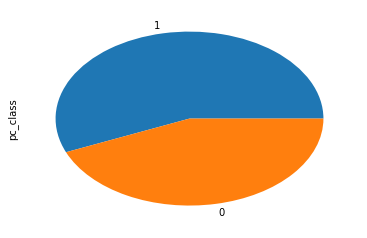

In [15]:
import matplotlib.pylab as plt
%matplotlib inline
y.value_counts().plot(kind='pie')

In [16]:
import nltk
import re
from nltk.corpus import stopwords

In [17]:
# #Dataset Preprosessing
# from nltk.stem.porter import PorterStemmer
# def stem_tokenizer(text):
#     ps = PorterStemmer()
#     corpus = []
#     for i in range(len(X)):

#         headline= re.sub('[^a-zA-Z]',' ',X[i])
        
#         headline = headline.lower()
#         # stopwords like “not”,"aren't" will be removed, will cause problems.
#         headline = headline.split()
#         headline = [ps.stem(word) for word in headline]
#         headline = ' '.join(headline)
#         corpus.append(headline)
#     return corpus
    

In [18]:
from nltk.stem.porter import PorterStemmer
def stem_tokenizer(text):
    ps = PorterStemmer()
    words = re.sub(r"[^A-Za-z0-9\-]", " ", text).lower().split()
    words = [ps.stem(word) for word in words]
    return words 

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(
                     tokenizer=stem_tokenizer,
                    max_df=0.5,
                    min_df=5,
                    ngram_range=(1, 2))

In [21]:
# cv.fit_transform(X_train[1:500])

# Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [23]:
# lg = LogisticRegression(penalty='l1', C = 1, solver = 'saga', n_jobs =-1)
# lg = LogisticRegression()

In [24]:
steps = [('cv',cv),
        ('lg',LogisticRegression(max_iter = 1000))]
lg_model = Pipeline(steps)

In [25]:

lg_model.fit(X_train,y_train)

Pipeline(steps=[('cv',
                 CountVectorizer(max_df=0.5, min_df=5, ngram_range=(1, 2),
                                 tokenizer=<function stem_tokenizer at 0x1230363a0>)),
                ('lg', LogisticRegression(max_iter=1000))])

In [26]:
from sklearn.metrics import roc_auc_score, classification_report


# print(precision_score(y_pred,y_test))
# # print(recall_score(model.predict(X_test,batch_size=1024),y_test))
print ('the AUC score is {}'.format(roc_auc_score(y_test,lg_model.predict(X_test))))
print(classification_report(y_test,lg_model.predict(X_test)))
print(classification_report(y_train,lg_model.predict(X_train)))

the AUC score is 0.5473289684116477
              precision    recall  f1-score   support

           0       0.48      0.43      0.45      6233
           1       0.62      0.67      0.64      8561

    accuracy                           0.57     14794
   macro avg       0.55      0.55      0.55     14794
weighted avg       0.56      0.57      0.56     14794

              precision    recall  f1-score   support

           0       0.82      0.73      0.77     15306
           1       0.80      0.88      0.84     19212

    accuracy                           0.81     34518
   macro avg       0.81      0.80      0.80     34518
weighted avg       0.81      0.81      0.81     34518



In [27]:
grams = [''] * len(lg_model['cv'].vocabulary_)
for k, v in lg_model['cv'].vocabulary_.items():
    grams[v] = k

In [28]:
gram_weight = list(zip(grams, lg_model['lg'].coef_[0]))
gram_weight.sort(key=lambda x: x[1])

In [29]:
gram_weight[:5]

[('leido', -2.0168313850345947),
 ('spotlight on', -1.9306086410798264),
 ('luminar', -1.9149366492663824),
 ('mahindra', -1.8946421036076606),
 ('catal', -1.8327193646611617)]

In [30]:
gram_weight[-5:]

[('novemb 12th', 1.820898994556641),
 ('shed', 1.864482260481145),
 ('acceleron', 1.9368496107198616),
 ('wind', 1.9737304635710902),
 ('mull', 2.1932304585114677)]

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(
                        tokenizer=stem_tokenizer,
                        lowercase=True,
                        max_df=0.5,
                        min_df=20,
                        ngram_range=(1, 2)
                       )

In [32]:
lgclassifier = Pipeline([('tfidf', tfidf), ('lg', LogisticRegression(max_iter = 1000))])

In [33]:
lgclassifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.5, min_df=20, ngram_range=(1, 2),
                                 tokenizer=<function stem_tokenizer at 0x1230363a0>)),
                ('lg', LogisticRegression(max_iter=1000))])

In [34]:
from sklearn.metrics import roc_auc_score, classification_report


# print(precision_score(y_pred,y_test))
# # print(recall_score(model.predict(X_test,batch_size=1024),y_test))
print ('the AUC score is {}'.format(roc_auc_score(y_test,lg_model.predict(X_test))))
print(classification_report(y_test,lg_model.predict(X_test)))
print(classification_report(y_train,lg_model.predict(X_train)))

the AUC score is 0.5473289684116477
              precision    recall  f1-score   support

           0       0.48      0.43      0.45      6233
           1       0.62      0.67      0.64      8561

    accuracy                           0.57     14794
   macro avg       0.55      0.55      0.55     14794
weighted avg       0.56      0.57      0.56     14794

              precision    recall  f1-score   support

           0       0.82      0.73      0.77     15306
           1       0.80      0.88      0.84     19212

    accuracy                           0.81     34518
   macro avg       0.81      0.80      0.80     34518
weighted avg       0.81      0.81      0.81     34518



In [35]:
grams = [''] * len(lgclassifier['tfidf'].vocabulary_)
for k, v in lgclassifier['tfidf'].vocabulary_.items():
    grams[v] = k

In [36]:
gram_weight = list(zip(grams, lgclassifier['lg'].coef_[0]))
gram_weight.sort(key=lambda x: x[1])

In [37]:
gram_weight[:5]

[('adob', -3.486986846923328),
 ('fedex', -3.366559608577321),
 ('facebook', -3.0191612424994356),
 ('trump', -2.7967020238226286),
 ('gener electr', -2.695593577984043)]

In [38]:
gram_weight[-5:]

[('recal', 2.1451759781812934),
 ('viru', 2.2458607159071393),
 ('microsoft', 2.2537974880640346),
 ('ford', 2.2727909431988573),
 ('acceleron', 2.2777906979677787)]